In [25]:
import warnings
import matplotlib
%matplotlib notebook
warnings.filterwarnings('ignore')

### Import EEG data

In [26]:
import mne
from mne.io import read_raw_eeglab
from pycrostates.datasets import lemon

raw_fname = lemon.load_data(subject_id='010017', condition='EC')
raw = read_raw_eeglab(raw_fname, preload=True)
raw.crop(0, 30)
raw.pick('eeg')
raw.set_eeg_reference('average');

Reading C:\Users\ferat\pycrostates_data\PREPROCESSED_LEMON\sub-010017_EC.fdt
Reading 0 ... 119451  =      0.000 ...   477.804 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


### Fit

100%|███████████████████████████████████████████████████████████████████████████|  : 100/100 [00:12<00:00,    8.01it/s]


[kmeans.fit] INFO: Selecting run with highest GEV = 67.83% after 100/100 iterations converged.


<IPython.core.display.Javascript object>


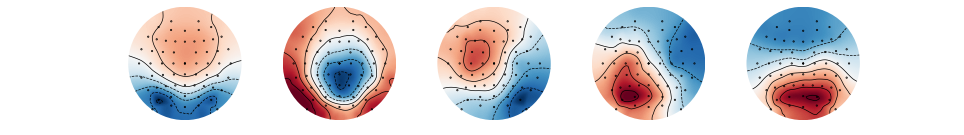

In [27]:
from pycrostates.cluster import ModKMeans

n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK.fit(raw, picks='eeg', tmin=None, tmax=None, reject_by_annotation=True, n_jobs=5, verbose=None)
ModK.plot();

<IPython.core.display.Javascript object>


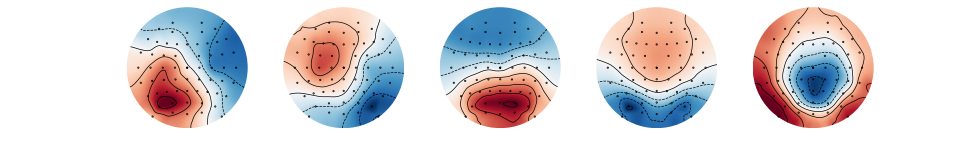

In [28]:
ModK.reorder_clusters(order=[3, 2, 4, 0, 1])
ModK.rename_clusters(new_names=['A', 'B', 'C', 'D', 'F'])
ModK.plot();

### Predict

[_base.predict] INFO: Segmenting data with factor 10 and effective smoothing window size: 0.0840 (ms).
[_base.predict] INFO: Rejecting segments shorter than 0.0200 (ms).
[_base.predict] INFO: Rejecting first and last segments.


<IPython.core.display.Javascript object>


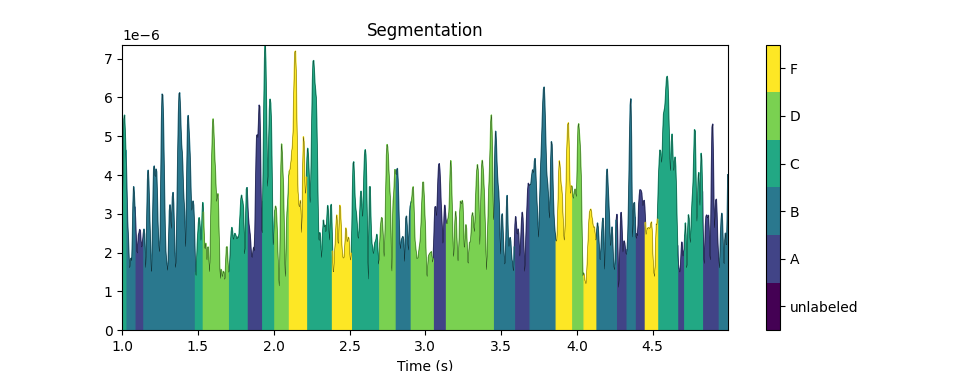

[segmentation._plot_segmentation] INFO: For visualization purposes, the last segment appears truncated by 1 sample. In the case where the last segment is 1 sample long, it does not appear.


In [29]:
segmentation = ModK.predict(raw, reject_by_annotation=True, factor=10,
                            half_window_size=10, min_segment_length=5,
                            reject_edges=True)
segmentation.plot(tmin=1, tmax=5);

In [30]:
import pandas as pd
pd.DataFrame([segmentation.compute_parameters()])

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,D_gev,D_occurrences,D_timecov,D_meandurs,F_mean_corr,F_gev,F_occurrences,F_timecov,F_meandurs,unlabeled
0,0.522239,0.050147,1.553424,0.152236,0.098,0.574443,0.098253,1.857355,0.22653,0.121964,...,0.199664,1.857355,0.250574,0.134909,0.509294,0.03492,1.317034,0.118871,0.090256,0.013065
